# **Cardiovascular disease**

## **Packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

# **About the dataset**

In [109]:
health_data = pd.read_csv("health_data.csv")
print(health_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70000 non-null  int64  
 1   id           70000 non-null  float64
 2   age          70000 non-null  float64
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  float64
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  float64
 7   ap_lo        70000 non-null  float64
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(6), int64(8)
memory usage: 7.5 MB
None


**About Dataset**  
**Data description**  

There are 3 types of input features:  

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [110]:
health_data["Unnamed: 0"].head()

0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64

In [111]:
health_data["id"].head()

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
Name: id, dtype: float64

In [112]:
health_data["age"].describe()

count    70000.000000
mean     19468.865814
std       2467.251667
min      10798.000000
25%      17664.000000
50%      19703.000000
75%      21327.000000
max      23713.000000
Name: age, dtype: float64

In [113]:
health_data.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [114]:
health_data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [115]:
numerical_data = health_data[['age','height', 'weight', 'ap_hi', 'ap_lo']]
correlations = numerical_data.corr()
correlations

,age,height,weight,ap_hi,ap_lo
age,1.000000,-0.081515,0.053684,0.020764,0.017647
height,-0.081515,1.000000,0.290968,0.005488,0.006150
weight,0.053684,0.290968,1.000000,0.030702,0.043710
ap_hi,0.020764,0.005488,0.030702,1.000000,0.016086
ap_lo,0.017647,0.006150,0.043710,0.016086,1.000000


Our dependent variable is "cardio".  
We want to predict how likely a patient with these features is to develop a cardiovascular disease.  
We need to find the best classifier model.  
I will start with these ones:  
- KNN
- Logistic regression
- Decision Tree Classifier

# **Preprocessing**

I have a high variance for age (in days). I will switch in years.

In [116]:
numerical_data.describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


## **Age**

In [117]:
health_data["age_years"] = np.round(health_data["age"]/365.25)
health_data["age_years"].describe()

count    70000.000000
mean        53.303157
std          6.760171
min         30.000000
25%         48.000000
50%         54.000000
75%         58.000000
max         65.000000
Name: age_years, dtype: float64

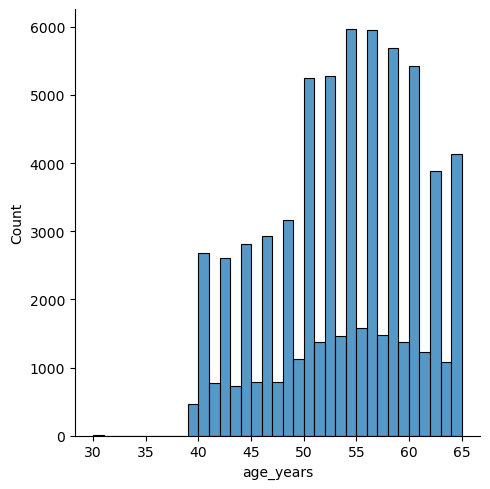

In [118]:
sns.displot(health_data["age_years"],bins=35)

Interesting distribution. Perhaps the patients have a free examination from 40 years and every 2 years. 

In [119]:
health_data.groupby("cardio")["age_years"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,35021.0,51.696553,6.780419,30.0,46.0,52.0,57.0,65.0
1,34979.0,54.911690,6.344676,39.0,50.0,56.0,60.0,65.0


<Axes: xlabel='cardio', ylabel='age_years'>

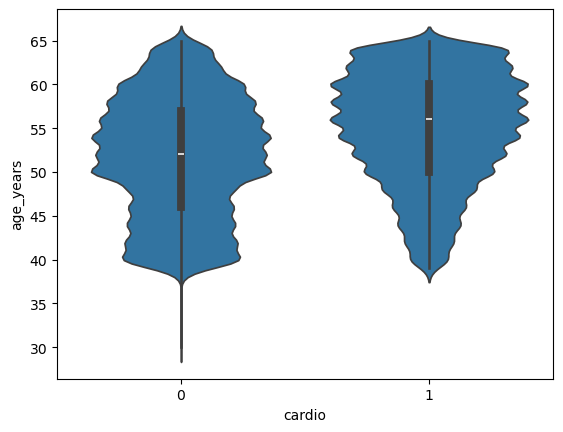

In [120]:
sns.violinplot(x="cardio", y="age_years", data=health_data)

I can remove the original age column (age in days)

In [121]:
health_data.drop("age", axis=1, inplace=True)

## **Gender**

In [122]:
health_data["gender"].value_counts(dropna=False)

gender
0    45530
1    24470
Name: count, dtype: int64

In the description of the data, they said 1=F and 2=m but I have 0 and 1. 

In [123]:
health_data.groupby("gender")["cardio"].value_counts(normalize=True)

gender  cardio
0       0         0.503273
        1         0.496727
1       1         0.505231
        0         0.494769
Name: proportion, dtype: float64

the gender doesn't seem to bring any useful information by itself for to the cardio vasc disease decision. I could potentially remove this feature.  
More investigation need to be done such as looking for correlations with the other features. 

## **weight**

In [124]:
health_data["weight"].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

10kg is way too low. 

In [125]:
unreasonnably_light = health_data[health_data["weight"] == 10]
unreasonnably_light

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
57858,1,165.0,10.0,180.0,1100.0,1,1,0,0,1,1,51.0


In [126]:
health_data.drop(unreasonnably_light.index, axis=0, inplace=True)

In [127]:
health_data["weight"].describe()

count    69999.000000
mean        74.206607
std         14.393814
min         11.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

In [128]:
from cardio_modules import Outliers

weight_outliers = Outliers(health_data,"weight")

min_outliers_weight = weight_outliers.outliers_min()
max_outliers_weight = weight_outliers.outliers_max()

overweight = health_data[health_data["weight"] >= max_outliers_weight]
under_weight = health_data[health_data["weight"] <= min_outliers_weight]
print(len(under_weight)/len(health_data))
len(overweight)/len(health_data)

0.000728581836883384


0.02524321776025372

In [129]:
under_weight.groupby("cardio")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,32.0,34.889063,4.420658,22.0,32.75,36.0,38.0,39.0
1,19.0,33.473684,7.066104,11.0,32.00,36.0,38.0,39.0


In [130]:
health_data.drop(under_weight.index, axis=0, inplace=True)

In [131]:
overweight.groupby("cardio")["weight"].describe()

,count,mean,std,min,25%,50%,75%,max
cardio,,,,,,,,
0,530.0,118.196981,12.737234,108.0,110.0,114.3,120.0,200.0
1,1237.0,118.997979,12.517432,108.0,110.0,115.0,123.0,200.0


I'm keeping the overweight

## **Height**

In [132]:
health_data["height"].describe()

count    69948.000000
mean       164.368874
std          8.199857
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

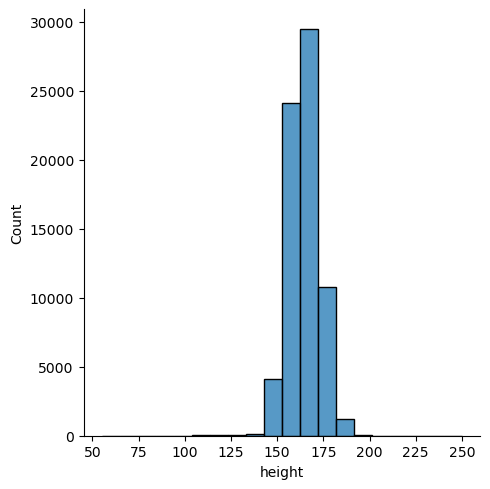

In [133]:
sns.displot(health_data["height"],bins=20)

In [134]:
height_outl = Outliers(health_data,"height")
min_height_outl = height_outl.outliers_min()
max_height_outl = height_outl.outliers_max()

giants = health_data[health_data["height"] >= max_height_outl]
dwarfs = health_data[health_data["height"] <= min_height_outl]

print(len(giants)/len(health_data))
print(len(dwarfs)/len(health_data))

0.0038457139589409277
0.003474009264024704


In [135]:
print(dwarfs["height"].describe())
print(dwarfs[dwarfs["height"] == 55])

count    243.000000
mean     125.172840
std       22.248107
min       55.000000
25%      120.000000
50%      137.000000
75%      140.000000
max      142.000000
Name: height, dtype: float64
       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
22723       0    55.0    81.0  130.0   90.0            0     0      0     0   

       active  cardio  age_years  
22723       1       1       64.0  


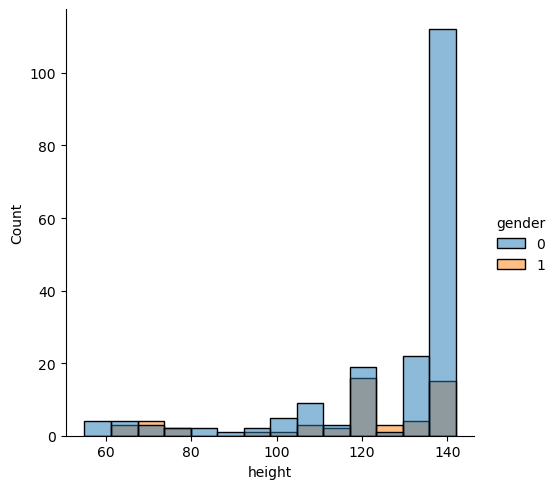

In [136]:
sns.displot(x="height", data=dwarfs, hue="gender")

In [137]:
print(len(dwarfs[dwarfs["height"] <= 100]))

32


I have less than 0.05% of both categories (dwarfs and giants) in the dataset.  
I will remove them as together, they don't even reach 1% of the entire dataset.

In [138]:
health_data.drop(dwarfs.index, axis=0, inplace=True)
health_data.drop(giants.index, axis=0, inplace=True)

In [139]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69436 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       69436 non-null  int64  
 1   height       69436 non-null  float64
 2   weight       69436 non-null  float64
 3   ap_hi        69436 non-null  float64
 4   ap_lo        69436 non-null  float64
 5   cholesterol  69436 non-null  int64  
 6   gluc         69436 non-null  int64  
 7   smoke        69436 non-null  int64  
 8   alco         69436 non-null  int64  
 9   active       69436 non-null  int64  
 10  cardio       69436 non-null  int64  
 11  age_years    69436 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 6.9 MB


## **Systolic blood pressure**

In [140]:
health_data["ap_hi"].describe()

count    69436.000000
mean       128.840745
std        154.624001
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

Negative systolic blood pressure is definitely not normal.

In [141]:
syst_outliers = Outliers(health_data,"ap_hi")
min_syst_outliers = syst_outliers.outliers_min()
max_syst_outliers = syst_outliers.outliers_max()
print(min_syst_outliers)
print(max_syst_outliers)

90.0
170.0


In [142]:
negative_ap_hi = health_data[health_data["ap_hi"] <=0]
negative_ap_hi["ap_hi"].describe()

count      7.000000
mean    -120.714286
std       18.803495
min     -150.000000
25%     -130.000000
50%     -120.000000
75%     -107.500000
max     -100.000000
Name: ap_hi, dtype: float64

I can imput by switching to the absolute value.

In [143]:
health_data["ap_hi"] = abs(health_data["ap_hi"])

In [144]:
health_data["ap_hi"].describe()

count    69436.000000
mean       128.865084
std        154.603717
min          1.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [145]:
max_systo_outliers = health_data[health_data["ap_hi"] >= max_syst_outliers]
min_systo_outliers = health_data[health_data["ap_hi"] <= min_syst_outliers]
print(len(max_systo_outliers)/len(health_data))
print(len(min_systo_outliers)/len(health_data))

0.026110375021602628
0.01836223284751426


In [152]:
max_systo_outliers["ap_hi"].describe()

count     1813.000000
mean       260.562052
std        942.643067
min        170.000000
25%        170.000000
50%        180.000000
75%        180.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [149]:
len(max_systo_outliers[max_systo_outliers["ap_hi"] >=200])/len(health_data)

0.0030243677631199956

In [150]:
aberr_systo = max_systo_outliers[max_systo_outliers["ap_hi"] >=200]

In [151]:
health_data.drop(aberr_systo.index, axis=0, inplace=True)

In [153]:
health_data["ap_hi"].describe()

count    69226.000000
mean       126.516136
std         17.589020
min          1.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64

In [154]:
min_systo_outliers["ap_hi"].describe()

count    1275.000000
mean       78.178824
std        26.513662
min         1.000000
25%        90.000000
50%        90.000000
75%        90.000000
max        90.000000
Name: ap_hi, dtype: float64

In [156]:
len(min_systo_outliers[min_systo_outliers["ap_hi"] <=50])/len(health_data)

0.0025423973651518216

In [157]:
aberr_min_systo = min_systo_outliers[min_systo_outliers["ap_hi"] <=50]

In [158]:
health_data.drop(aberr_min_systo.index, axis=0, inplace=True)

In [159]:
health_data["ap_hi"].describe()

count    69050.000000
mean       126.806488
std         16.642950
min         60.000000
25%        120.000000
50%        120.000000
75%        140.000000
max        199.000000
Name: ap_hi, dtype: float64